<a href="https://colab.research.google.com/github/VertMarques/Imersao_aula_04/blob/main/CensoHospitalar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iniciando o projeto de Imersão IA Alura✌

Garantindo que a SDK esteja instalada...

In [1]:
#instalando se forma silenciosa a generativeai
!pip install -q -U google-generativeai



Preparação inicial do ambiente e autenticação.


In [3]:
#iniciando o processo de importação das bibliotecas necessárias ao projeto.
import google.generativeai as genai
from google.colab import widgets
from IPython.display import display
from IPython.display import Markdown
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import textwrap

#ocultando a API Key
from google.colab import userdata

#declarando a variável 'CHAVE_SECRETA' e o método para obter.
api_key = userdata.get('SECRET_KEY')

#Solicitando que a autenticação ocorra através da api_key, que está devidamente guardada no cofre de segredos da conta.
genai.configure(api_key=api_key)

Definindo as ***configurações***.

In [4]:
#a variável 'generation_config' receberá esses parâmetros de comportamento do modelo em relação as respostas que ele vai gerar, por exemplo.
generation_config = {
    'candidate_count': 1,
    'temperature': 0.9,
    'top_k': 40,
    'top_p': 0.9
}

Estabelecendo o nível de ***segurança***

In [5]:
#Devido a característica do projeto, o bloqueio será pensado para pegar de média a alta chance de conteúdo perigoso.
safety_settings = {
  "HARASSMENT": "BLOCK_LOW_AND_ABOVE",
  "HATE": "BLOCK_LOW_AND_ABOVE",
  "SEXUAL": "BLOCK_LOW_AND_ABOVE",
  "DANGEROUS": "BLOCK_LOW_AND_ABOVE"
}

Escolhendo o modelo de conteúdo...

In [6]:
#primeiro listar os modelos de conteúdo disponíveis.
for mcont in genai.list_models():
  if 'generateContent' in mcont.supported_generation_methods:
    print(mcont.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [7]:
#depois a escolha pelo modelo de conteúdo mais estável.
mcont = genai.GenerativeModel(model_name="gemini-1.0-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

Preenchimento do censo hospitalar personalizado para médico e para enfermeiro

In [8]:
#Criando a funcionalidade para definir a coleta de dados por médico ou por enfermeiro
def valida_entrada(prompt, tipo_dado):
  """
  Função para validar a entrada do usuário.

  Argumentos:
    prompt: Texto a ser exibido antes da entrada do usuário.
    tipo_dado: Tipo de dado esperado (int ou str).

  Retorno:
    Valor digitado pelo usuário após a validação.
  """
  while True:
    try:
      valor = input(prompt)
      if tipo_dado == int:
        valor = int(valor)
      elif tipo_dado == str:
        valor = valor.strip()
      else:
        raise ValueError("Tipo de dado inválido.")
      return valor
    except ValueError:
      print("Valor inválido. Digite novamente.")

#Pergunta a profissão do usuário
profissao = valida_entrada("Qual sua profissão (médico ou enfermeiro)? ", str).lower()

while profissao not in ["médico", "enfermeiro"]:
  profissao = valida_entrada("Profissão inválida. Digite novamente (médico ou enfermeiro): ", str).lower()

#Formulário para médicos
if profissao == "médico":
  dados_medico = {
      "total_leitos_uti": None,
      "leitos_uti_ocupados": None,
      "total_leitos_clinica_medica": None,
      "leitos_clinica_medica_ocupados": None,
      "total_leitos_pediatria": None,
      "leitos_pediatria_ocupados": None,
      "total_leitos_ginecologia": None,
      "leitos_ginecologia_ocupados": None,
      "total_pacientes_internados": None
  }

  for campo in dados_medico:
    while True:
      valor = valida_entrada(f"Digite o {campo}: ", int)
      dados_medico[campo] = valor
      if valor is not None:
        break
      print("Atenção! O campo está sem preenchimento.")

  #Exibe os dados coletados
  print("\nDados coletados:")
  for campo, valor in dados_medico.items():
    print(f"{campo}: {valor}")

#Formulário para enfermeiros
elif profissao == "enfermeiro":
  dados_enfermeiro = {
      "total_leitos_enfermaria": None,
      "leitos_enfermaria_ocupados": None,
      "total_classificacoes_risco": None,
      "total_pacientes_transferidos": None
  }

  for campo in dados_enfermeiro:
    while True:
      valor = valida_entrada(f"Digite o {campo}: ", int)
      dados_enfermeiro[campo] = valor
      if valor is not None:
        break
      print("Atenção! O campo está sem preenchimento.")

  #Exibe os dados coletados
  print("\nDados coletados:")
  for campo, valor in dados_enfermeiro.items():
    print(f"{campo}: {valor}")

print("\nCenso hospitalar completo!")

Qual sua profissão (médico ou enfermeiro)? Medico
Profissão inválida. Digite novamente (médico ou enfermeiro): Médico
Digite o total_leitos_uti: 10
Digite o leitos_uti_ocupados: 7
Digite o total_leitos_clinica_medica: 10
Digite o leitos_clinica_medica_ocupados: 5
Digite o total_leitos_pediatria: 10
Digite o leitos_pediatria_ocupados: 3
Digite o total_leitos_ginecologia: 5
Digite o leitos_ginecologia_ocupados: 2
Digite o total_pacientes_internados: 17

Dados coletados:
total_leitos_uti: 10
leitos_uti_ocupados: 7
total_leitos_clinica_medica: 10
leitos_clinica_medica_ocupados: 5
total_leitos_pediatria: 10
leitos_pediatria_ocupados: 3
total_leitos_ginecologia: 5
leitos_ginecologia_ocupados: 2
total_pacientes_internados: 17

Censo hospitalar completo!


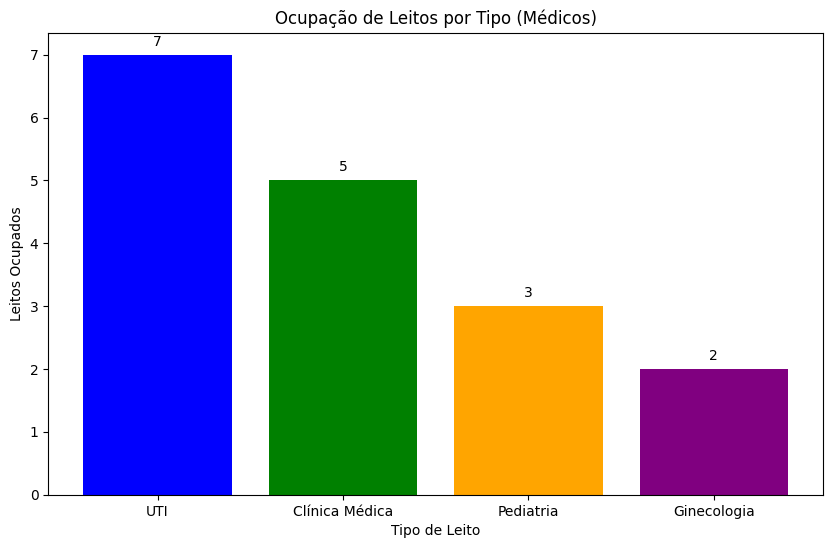

In [9]:
#Considerando os dados coletados
tipos_leito = ["UTI", "Clínica Médica", "Pediatria", "Ginecologia"]
leitos_ocupados_medico = np.array([dados_medico["leitos_uti_ocupados"],
                                 dados_medico["leitos_clinica_medica_ocupados"],
                                 dados_medico["leitos_pediatria_ocupados"],
                                 dados_medico["leitos_ginecologia_ocupados"]])

plt.figure(figsize=(10, 6))
barras = plt.bar(tipos_leito, leitos_ocupados_medico, color=['blue', 'green', 'orange', 'purple'], align='center')

# Adicionar rótulos de dados acima de cada barra
for barra, valor in zip(barras, leitos_ocupados_medico):
    altura_barra = valor + 0.1  # Ajustar a altura do rótulo se necessário
    plt.text(barra.get_x() + barra.get_width() / 2, altura_barra, valor, ha='center', va='bottom')

plt.xlabel("Tipo de Leito")
plt.ylabel("Leitos Ocupados")
plt.title("Ocupação de Leitos por Tipo (Médicos)")
plt.show()


Criando um chat para o gestor da instituição

In [10]:
#Criando a variável de chat
chat = mcont.start_chat(history=[])

In [15]:
#Iniciando um chatbot
prompt = input("Faça a sua pergunta: ")

#Criando as condições de interação
while prompt != "sair":
  '''//response = chat.send_message(prompt)'''
  model_2 = genai.GenerativeModel("gemini-1.0-pro",
                                generation_config=generation_config)
  response = model_2.generate_content(prompt)
  print("Resposta: ", response.text, "\n")
  prompt = input("Digite a sua pergunta: ")

Faça a sua pergunta: quantos leitos em ginecologia ocupados?
Resposta:  Não tenho acesso a informações em tempo real sobre o número de leitos ocupados em ginecologia. Para obter as informações mais atualizadas, recomendo entrar em contato diretamente com o hospital ou clínica em questão. 

Digite a sua pergunta: sair


In [12]:
#Melhorando a visualização
def to_markdown(text):
  """Formata o texto como Markdown."""
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

#Imprimindo o histórico
for message in chat.history:
  display(to_markdown(f"**{message.role}:** {message.parts[0].text}"))
  print('------------------------------')

> **user:** Quantos paciente tem na clinica médica?

------------------------------


> **model:** Essa informação não está disponível no contexto fornecido.

------------------------------


> **user:** pacientes em pediatria

------------------------------


> **model:** Essa informação não está disponível no contexto fornecido.

------------------------------
